You are given an n x n integer matrix board where the cells are labeled from 1 to n2 in a Boustrophedon style starting from the bottom left of the board (i.e. board[n - 1][0]) and alternating direction each row.

You start on square 1 of the board. In each move, starting from square curr, do the following:

    Choose a destination square next with a label in the range [curr + 1, min(curr + 6, n2)].
        This choice simulates the result of a standard 6-sided die roll: i.e., there are always at most 6 destinations, regardless of the size of the board.
    If next has a snake or ladder, you must move to the destination of that snake or ladder. Otherwise, you move to next.
    The game ends when you reach the square n2.

A board square on row r and column c has a snake or ladder if board[r][c] != -1. The destination of that snake or ladder is board[r][c]. Squares 1 and n2 do not have a snake or ladder.

Note that you only take a snake or ladder at most once per move. If the destination to a snake or ladder is the start of another snake or ladder, you do not follow the subsequent snake or ladder.

    For example, suppose the board is [[-1,4],[-1,3]], and on the first move, your destination square is 2. You follow the ladder to square 3, but do not follow the subsequent ladder to 4.

Return the least number of moves required to reach the square n2. If it is not possible to reach the square, return -1.

 

Example 1:

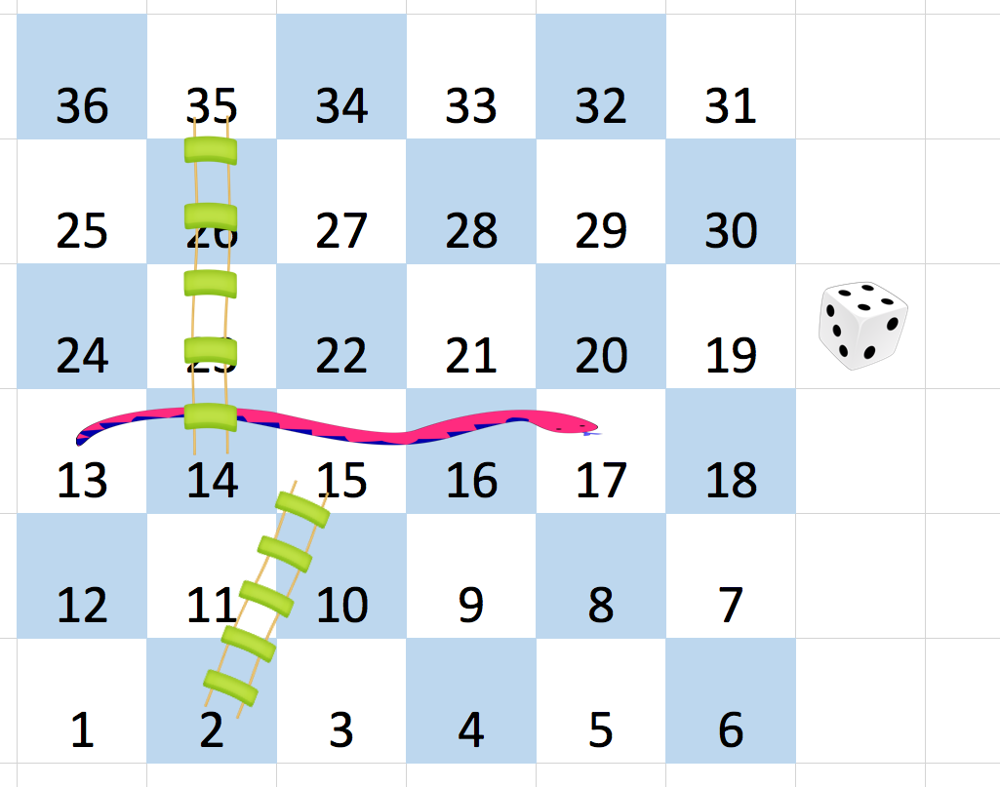

Input: board = [[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1,-1],[-1,35,-1,-1,13,-1],[-1,-1,-1,-1,-1,-1],[-1,15,-1,-1,-1,-1]]
Output: 4
Explanation: 
In the beginning, you start at square 1 (at row 5, column 0).
You decide to move to square 2 and must take the ladder to square 15.
You then decide to move to square 17 and must take the snake to square 13.
You then decide to move to square 14 and must take the ladder to square 35.
You then decide to move to square 36, ending the game.
This is the lowest possible number of moves to reach the last square, so return 4.

Example 2:

Input: board = [[-1,-1],[-1,3]]
Output: 1

 

Constraints:

    n == board.length == board[i].length
    2 <= n <= 20
    grid[i][j] is either -1 or in the range [1, n2].
    The squares labeled 1 and n2 do not have any ladders or snakes.



In [42]:
from typing import List
from collections import deque

class Solution:
    def snakesAndLadders(self, board: List[List[int]]) -> int:
        n = len(board)
        translation = {}
        i = 1
        for row in range(n):
            for col in range(n):
                if row % 2 == 0:
                    translation[i] = [n - row - 1, col]
                else:
                    translation[i] = [n - row - 1, n - col - 1]
                i += 1
        
        q = deque()
        q.append([1, 0])
        ans = float("inf")
        dist = {i + 1: float("inf") for i in range(n * n)}
        while q:
            curr, moves = q.popleft()
            if moves > ans:
                continue
            
            if dist[curr] > moves:
                dist[curr] = moves
            else:
                continue
    
            if board[translation[curr][0]][translation[curr][1]] != -1:
                curr = board[translation[curr][0]][translation[curr][1]]
                if dist[curr] > moves:
                    dist[curr] = moves
                else:
                    continue
            
            if curr == n * n:
                ans = min(ans, moves)
                continue
            
            for i in range(curr + 1, curr + 7):
                if i <= n * n:
                    q.append([i, moves + 1])
                    
        return -1 if ans == float("inf") else ans

In [ ]:
from typing import List
from collections import deque

class Solution:
    def snakesAndLadders(self, board: List[List[int]]) -> int:
        n = len(board)
        cells = [None] * (n**2 + 1)
        label = 1
        columns = list(range(0, n))
        for row in range(n - 1, -1, -1):
            for column in columns:
                cells[label] = (row, column)
                label += 1
            columns.reverse()
        dist = [-1] * (n * n + 1)
        q = deque([1])
        dist[1] = 0
        while q:
            curr = q.popleft()
            for next in range(curr + 1, min(curr + 6, n**2) + 1):
                row, column = cells[next]
                destination = (board[row][column] if board[row][column] != -1
                               else next)
                if dist[destination] == -1:
                    dist[destination] = dist[curr] + 1
                    q.append(destination)
        return dist[n * n]

In [43]:
s = Solution()
s.snakesAndLadders(
    [
        [-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1],
        [-1,-1,-1,-1,-1,-1],
        [-1,35,-1,-1,13,-1],
        [-1,-1,-1,-1,-1,-1],
        [-1,15,-1,-1,-1,-1]],
)

4

In [44]:
s.snakesAndLadders([[1,1,-1],[1,1,1],[-1,1,1]])

-1